In [1]:
import csv
from math import isnan

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constants

In [2]:
grid_results_fname = 'local_search_grid_dataframe.out'
bcc_results_fname = 'local_search_bcc_dataframe.out'
NUM_BOX_SIZES = 5
BOX_SIZES = [10, 15, 20, 25, 30]
CUBE_SIZES = [box_size**3 for box_size in BOX_SIZES]
GEOGRAPH_STATUS_TO_INDEX = {'fail_1': 0, 'fail_2': 1, 'fail_3': 2, 'fail_4': 3, 'fail_5': 4, 'success': 5}
BFS_STATUS_TO_INDEX = {'failure': 0, 'success': 1}

# Plotting parameters
MARKER_SIZE = 8
LOG_X = False
LOG_Y = False
Y_MAX = 800
point_markers = ["s", "P", "^", "x", "+", "D", ">", "*", "v", "o"]
plt.rcParams['font.size'] = '18'

## Seaborn setup

In [3]:
sns.set_context("paper", font_scale=1.5, \
                rc={"font.family": "sans-serif", "font.sans-serif": \
                    ["Helvetica", "DejaVu Sans", "Arial", "sans-serif"]})
sns.set_palette(sns.xkcd_palette(colors=["navy", "grey"]))

# Grid (Cubic Honeycomb) Results

## Load data

In [4]:
grid_df = pd.read_csv(grid_results_fname)
print(len(grid_df))
grid_df["number of cells"] = grid_df["number of cells"] / 1000.
grid_df["number of cells"] = grid_df["number of cells"].round(decimals=1)
unique_cell_counts_grid = np.unique(grid_df["number of cells"])
grid_df.head(12)

56


,number of cells,flip type,status,average microseconds,number of samples
0,1.0,geograph3d,fail_1,114.4570,3951
1,1.0,geograph3d,fail_2,NaN,0
2,1.0,geograph3d,fail_3,153.3990,213
3,1.0,geograph3d,fail_4,155.9430,297
4,1.0,geograph3d,fail_5,160.4730,419
5,1.0,geograph3d,success,211.3520,5120
6,1.0,bfs,failure,11.6529,1550
7,1.0,bfs,success,6.7987,8450
8,3.4,geograph3d,fail_1,121.1170,13081
9,3.4,geograph3d,fail_2,NaN,0


In [5]:
df2 = grid_df.copy()
df2["flip result"] = df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
df2["total microseconds"] = df2["average microseconds"] * df2["number of samples"]
df2.head(12)

,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,1.0,geograph3d,fail_1,114.4570,3951,failure,452219.607
1,1.0,geograph3d,fail_2,NaN,0,failure,NaN
2,1.0,geograph3d,fail_3,153.3990,213,failure,32673.987
3,1.0,geograph3d,fail_4,155.9430,297,failure,46315.071
4,1.0,geograph3d,fail_5,160.4730,419,failure,67238.187
5,1.0,geograph3d,success,211.3520,5120,success,1082122.240
6,1.0,bfs,failure,11.6529,1550,failure,18061.995
7,1.0,bfs,success,6.7987,8450,success,57449.015
8,3.4,geograph3d,fail_1,121.1170,13081,failure,1584331.477
9,3.4,geograph3d,fail_2,NaN,0,failure,NaN


In [6]:
df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)"}, \
           inplace=True)
df3 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
df3["CPU Time (microseconds)"] = df3["total microseconds"] / df3["number of samples"]
df3.drop(columns=["total microseconds"], inplace=True)
df3.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                             
1.0                         bfs        failure                11.652900   
                                       success                 6.798700   
                            geograph3d failure               122.632552   
                                       success               211.352000   
3.4                         bfs        failure                37.471400   
                                       success                15.002500   
                            geograph3d failure               128.243076   
                                       success               222.955000   
8.0                         bfs        failure                94.704700   
                                       success                28.156000   
                            geograph3d failure               133.275040   
                                       success               233.554000   

                                                number of samples  
Number of Cells (thousands) Flip Type  Status                      
1.0                         bfs        failure               1550  
                                       success               8450  
                            geograph3d failure               4880  
                                       success               5120  
3.4                         bfs        failure               3494  
                                       success              30256  
                            geograph3d failure              16023  
                                       success              17727  
8.0                         bfs        failure               7236  
                                       success              72764  
                            geograph3d failure              39050  
                                       success              40950

In [7]:
df4 = df2.groupby(["Number of Cells (thousands)", "Flip Type"]).sum()
df4["CPU Time (microseconds)"] = df4["total microseconds"] / df4["number of samples"]
df4["Status"] = "combined"
df4.drop(columns=["total microseconds"], inplace=True)
df4 = df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
df4.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                              
1.0                         bfs        combined                 7.551101   
                            geograph3d combined               168.056909   
3.4                         bfs        combined                17.328614   
                            geograph3d combined               177.989988   
8.0                         bfs        combined                34.175330   
                            geograph3d combined               184.605333   
15.6                        bfs        combined                60.581849   
                            geograph3d combined               192.469684   
27.0                        bfs        combined                96.831715   
                            geograph3d combined               192.922066   
42.9                        bfs        combined               140.247145   
                            geograph3d combined               190.358100   

                                                 number of samples  
Number of Cells (thousands) Flip Type  Status                       
1.0                         bfs        combined              10000  
                            geograph3d combined              10000  
3.4                         bfs        combined              33750  
                            geograph3d combined              33750  
8.0                         bfs        combined              80000  
                            geograph3d combined              80000  
15.6                        bfs        combined             156250  
                            geograph3d combined             156250  
27.0                        bfs        combined             270000  
                            geograph3d combined             270000  
42.9                        bfs        combined             428750  
                            geograph3d combined             428750

In [8]:
df5 = pd.concat([df3, df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
df5.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                              
1.0                         bfs        combined                 7.551101   
                                       failure                 11.652900   
                                       success                  6.798700   
                            geograph3d combined               168.056909   
                                       failure                122.632552   
                                       success                211.352000   
3.4                         bfs        combined                17.328614   
                                       failure                 37.471400   
                                       success                 15.002500   
                            geograph3d combined               177.989988   
                                       failure                128.243076   
                                       success                222.955000   

                                                 number of samples  
Number of Cells (thousands) Flip Type  Status                       
1.0                         bfs        combined              10000  
                                       failure                1550  
                                       success                8450  
                            geograph3d combined              10000  
                                       failure                4880  
                                       success                5120  
3.4                         bfs        combined              33750  
                                       failure                3494  
                                       success               30256  
                            geograph3d combined              33750  
                                       failure               16023  
                                       success               17727

## Plot execution time vs. number of cells

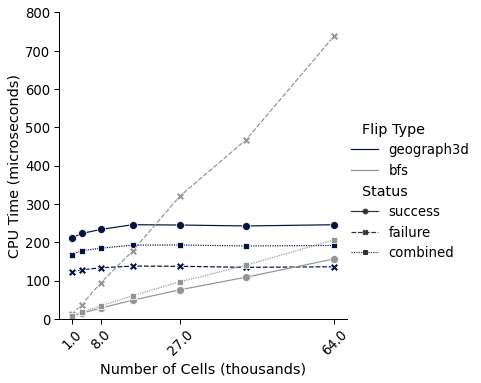

In [12]:
g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure", "combined"], kind="line", markers=True, markersize=MARKER_SIZE, data=df5);
fig = plt.gcf()
axes = np.array(g.axes.flat)
for ax in axes:
    if LOG_X: ax.set(xscale="log")
    ax.set_xticks([unique_cell_counts_grid[0], unique_cell_counts_grid[2], unique_cell_counts_grid[4], unique_cell_counts_grid[6]])
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    
    if LOG_Y: ax.set(yscale="log")
    ax.set_ylim([0, Y_MAX])
    
# fig.set_size_inches(8, 4)
# plt.title("Cubic Honeycomb (CH)")
plt.savefig("ch_results_plot.pdf", dpi=600, bbox_inches="tight")

# BCC Results

## Load data

In [11]:
bch_df = pd.read_csv(bcc_results_fname)
print(len(bch_df))
bch_df["number of cells"] = bch_df["number of cells"] / 1000.
bch_df["number of cells"] = bch_df["number of cells"].round(decimals=1)
unique_cell_counts_bch = np.unique(bch_df["number of cells"])
bch_df.head()

56


,number of cells,flip type,status,average microseconds,number of samples
0,1.7,geograph3d,fail_1,209.621,9954
1,1.7,geograph3d,fail_2,NaN,0
2,1.7,geograph3d,fail_3,292.862,4213
3,1.7,geograph3d,fail_4,271.728,169
4,1.7,geograph3d,fail_5,214.312,16


In [12]:
bch_df2 = bch_df.copy()
bch_df2["flip result"] = bch_df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
bch_df2["total microseconds"] = bch_df2["average microseconds"] * bch_df2["number of samples"]
bch_df2.head()

,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,1.7,geograph3d,fail_1,209.621,9954,failure,2086567.434
1,1.7,geograph3d,fail_2,NaN,0,failure,NaN
2,1.7,geograph3d,fail_3,292.862,4213,failure,1233827.606
3,1.7,geograph3d,fail_4,271.728,169,failure,45922.032
4,1.7,geograph3d,fail_5,214.312,16,failure,3428.992


In [13]:
bch_df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)"}, \
           inplace=True)
bch_df3 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
bch_df3["CPU Time (microseconds)"] = bch_df3["total microseconds"] / bch_df3["number of samples"]
bch_df3.drop(columns=["total microseconds"], inplace=True)
bch_df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                             
1.7                         bfs        failure                37.385400   
                                       success                12.286500   
                            geograph3d failure               234.792786   
                                       success               374.157000   
6.1                         bfs        failure               242.901000   
                                       success                33.108300   
                            geograph3d failure               252.746087   
                                       success               415.156000   
14.9                        bfs        failure               747.702000   
                                       success                74.658300   
                            geograph3d failure               262.667817   
                                       success               443.995000   
29.4                        bfs        failure              1900.860000   
                                       success               146.415000   
                            geograph3d failure               281.866386   
                                       success               480.142000   
51.4                        bfs        failure              3842.530000   
                                       success               230.893000   
                            geograph3d failure               270.119199   
                                       success               467.574000   
82.2                        bfs        failure              5749.250000   
                                       success               353.929000   
                            geograph3d failure               271.439744   
                                       success               472.886000   
123.3                       bfs        failure             10369.100000   
                                       success               526.911000   
                            geograph3d failure               278.140039   
                                       success               479.715000   

                                                number of samples  
Number of Cells (thousands) Flip Type  Status                      
1.7                         bfs        failure                659  
                                       success              16631  
                            geograph3d failure              14352  
                                       success               2938  
6.1                         bfs        failure               1598  
                                       success              59592  
                            geograph3d failure              56448  
                                       success               4742  
14.9                        bfs        failure               1496  
                                       success             147094  
                            geograph3d failure             140264  
                                       success               8326  
29.4                        bfs        failure               1705  
                                       success             292785  
                            geograph3d failure             280557  
                                       success              13933  
51.4                        bfs        failure               2422  
                                       success             511468  
                            geograph3d failure             490920  
                                       success              22970  
82.2                        bfs        failure               2827  
                                       success             818963  
                            geograph3d failure             787081  
                                       success              34709  
123.3                       b

In [14]:
bch_df4 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type"]).sum()
bch_df4["CPU Time (microseconds)"] = bch_df4["total microseconds"] / bch_df4["number of samples"]
bch_df4["Status"] = "combined"
bch_df4.drop(columns=["total microseconds"], inplace=True)
bch_df4 = bch_df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
bch_df4.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                              
1.7                         bfs        combined                13.243132   
                            geograph3d combined               258.474224   
6.1                         bfs        combined                38.587116   
                            geograph3d combined               265.332258   
14.9                        bfs        combined                81.434485   
                            geograph3d combined               272.828192   
29.4                        bfs        combined               156.572658   
                            geograph3d combined               291.247262   
51.4                        bfs        combined               247.914901   
                            geograph3d combined               278.945089   
82.2                        bfs        combined               372.489183   
                            geograph3d combined               279.947998   
123.3                       bfs        combined               557.494502   
                            geograph3d combined               286.678930   

                                                 number of samples  
Number of Cells (thousands) Flip Type  Status                       
1.7                         bfs        combined              17290  
                            geograph3d combined              17290  
6.1                         bfs        combined              61190  
                            geograph3d combined              61190  
14.9                        bfs        combined             148590  
                            geograph3d combined             148590  
29.4                        bfs        combined             294490  
                            geograph3d combined             294490  
51.4                        bfs        combined             513890  
                            geograph3d combined             513890  
82.2                        bfs        combined             821790  
                            geograph3d combined             821790  
123.3                       bfs        combined            1233190  
                            geograph3d combined            1233190

In [15]:
bch_df5 = pd.concat([bch_df3, bch_df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status"]).sum()
bch_df5.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status                              
1.7                         bfs        combined                13.243132   
                                       failure                 37.385400   
                                       success                 12.286500   
                            geograph3d combined               258.474224   
                                       failure                234.792786   
                                       success                374.157000   
6.1                         bfs        combined                38.587116   
                                       failure                242.901000   
                                       success                 33.108300   
                            geograph3d combined               265.332258   
                                       failure                252.746087   
                                       success                415.156000   
14.9                        bfs        combined                81.434485   
                                       failure                747.702000   
                                       success                 74.658300   
                            geograph3d combined               272.828192   
                                       failure                262.667817   
                                       success                443.995000   
29.4                        bfs        combined               156.572658   
                                       failure               1900.860000   
                                       success                146.415000   
                            geograph3d combined               291.247262   
                                       failure                281.866386   
                                       success                480.142000   
51.4                        bfs        combined               247.914901   
                                       failure               3842.530000   
                                       success                230.893000   
                            geograph3d combined               278.945089   
                                       failure                270.119199   
                                       success                467.574000   
82.2                        bfs        combined               372.489183   
                                       failure               5749.250000   
                                       success                353.929000   
                            geograph3d combined               279.947998   
                                       failure                271.439744   
                                       success                472.886000   
123.3                       bfs        combined               557.494502   
                                       failure              10369.100000   
                                       success                526.911000   
                            geograph3d combined               286.678930   
                                       failure                278.140039   
                                       success                479.715000   

                                                 number of samples  
Number of Cells (thousands) Flip Type  Status                       
1.7                         bfs        combined              17290  
                                       failure                 659  
                                       success               16631  
                            geograph3d combined              17290  
                                       failure               14352  
                                       success                2938  
6.1                         bfs        combined              61190  
                                       failure                1598  
              

## Plot CPU Time vs. Number of Cells

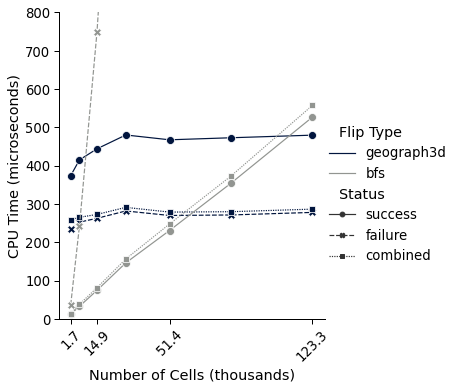

In [16]:
g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure", "combined"], kind="line", markers=True, markersize=MARKER_SIZE, data=bch_df5);
fig = plt.gcf()
axes = np.array(g.axes.flat)
for ax in axes:
    if LOG_X: ax.set(xscale="log")
    ax.set_xticks([unique_cell_counts_bch[0], unique_cell_counts_bch[2], unique_cell_counts_bch[4], unique_cell_counts_bch[6]])
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    if LOG_Y: ax.set(yscale="log")
    ax.set_ylim([0, Y_MAX])

# plt.title("Bitruncated Cubic Honeycomb (BCH)")
plt.savefig("bch_results_plot.pdf", dpi=300, bbox_inches="tight")